In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 7
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.5
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[7_10_51_300_0.5_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[7_10_51_300_0.5_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0248

Best Fitness:	700.4399
Solution:	700.0000
Diff:		0.4399

[0:06:34][----------] 1.96% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0194

Best Fitness:	700.6451
Solution:	700.0000
Diff:		0.6451

[0:12:33][----------] 3.92% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0764

Best Fitness:	700.6772
Solution:	700.0000
Diff:		0.6772

[0:18:17][#---------] 5.88% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0563

Best Fitness:	700.5748
Solution:	700.0000
Diff:		0.5748

[0:24:01][#---------] 7.84% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.1109

Best Fitness:	700.7989
Solution:	700.0000
Diff:		0.7989

[0:29:49][#---------] 9.80% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0022

Best Fitness:	700.5425
Solution:	700.0000
Diff:		0.5425

[0:35:35][#---------] 11.76% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0323

Best Fitness:	700.7717
Solution:	700.0000
Diff:		0.7717

[0:41:06][#---------] 13.73% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0443

Best Fitness:	700.7870
Solution:	700.0000
Diff:		0.7870

[0:45:55][##--------] 15.69% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0133

Best Fitness:	700.3879
Solution:	700.0000
Diff:		0.3879

[0:50:47][##--------] 17.65% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0085

Best Fitness:	700.7370
Solution:	700.0000
Diff:		0.7370

[0:55:51][##--------] 19.61% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0487

Best Fitness:	700.6047
Solution:	700.0000
Diff:		0.6047

[1:00:50][##--------] 21.57% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0457

Best Fitness:	700.7332
Solution:	700.0000
Diff:		0.7332

[1:05:46][##--------] 23.53% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0001

Best Fitness:	700.6838
Solution:	700.0000
Diff:		0.6838

[1:10:38][###-------] 25.49% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	700.9703

Best Fitness:	700.6293
Solution:	700.0000
Diff:		0.6293

[1:15:59][###-------] 27.45% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0606

Best Fitness:	700.7114
Solution:	700.0000
Diff:		0.7114

[1:20:57][###-------] 29.41% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0140

Best Fitness:	700.5588
Solution:	700.0000
Diff:		0.5588

[1:26:10][###-------] 31.37% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0101

Best Fitness:	700.6388
Solution:	700.0000
Diff:		0.6388

[1:31:09][###-------] 33.33% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0237

Best Fitness:	700.5832
Solution:	700.0000
Diff:		0.5832

[1:36:03][####------] 35.29% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0347

Best Fitness:	700.6758
Solution:	700.0000
Diff:		0.6758

[1:40:25][####------] 37.25% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0416

Best Fitness:	700.7153
Solution:	700.0000
Diff:		0.7153

[1:44:38][####------] 39.22% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0238

Best Fitness:	700.6319
Solution:	700.0000
Diff:		0.6319

[1:48:53][####------] 41.18% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0382

Best Fitness:	700.7467
Solution:	700.0000
Diff:		0.7467

[1:53:24][####------] 43.14% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0162

Best Fitness:	700.5589
Solution:	700.0000
Diff:		0.5589

[1:57:42][#####-----] 45.10% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0358

Best Fitness:	700.7033
Solution:	700.0000
Diff:		0.7033

[2:02:09][#####-----] 47.06% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0214

Best Fitness:	700.6964
Solution:	700.0000
Diff:		0.6964

[2:06:27][#####-----] 49.02% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	700.9916

Best Fitness:	700.5012
Solution:	700.0000
Diff:		0.5012

[2:10:50][#####-----] 50.98% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.1045

Best Fitness:	700.6419
Solution:	700.0000
Diff:		0.6419

[2:15:12][#####-----] 52.94% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.1106

Best Fitness:	700.8609
Solution:	700.0000
Diff:		0.8609

[2:19:39][#####-----] 54.90% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0014

Best Fitness:	700.6474
Solution:	700.0000
Diff:		0.6474

[2:23:49][######----] 56.86% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	700.9948

Best Fitness:	700.5785
Solution:	700.0000
Diff:		0.5785

[2:27:39][######----] 58.82% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0620

Best Fitness:	700.6954
Solution:	700.0000
Diff:		0.6954

[2:31:26][######----] 60.78% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0316

Best Fitness:	700.6987
Solution:	700.0000
Diff:		0.6987

[2:35:13][######----] 62.75% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0518

Best Fitness:	700.7279
Solution:	700.0000
Diff:		0.7279

[2:38:59][######----] 64.71% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0008

Best Fitness:	700.6571
Solution:	700.0000
Diff:		0.6571

[2:42:38][#######---] 66.67% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0641

Best Fitness:	700.7359
Solution:	700.0000
Diff:		0.7359

[2:46:15][#######---] 68.63% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0723

Best Fitness:	700.7641
Solution:	700.0000
Diff:		0.7641

[2:49:54][#######---] 70.59% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0305

Best Fitness:	700.6052
Solution:	700.0000
Diff:		0.6052

[2:53:27][#######---] 72.55% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0411

Best Fitness:	700.6465
Solution:	700.0000
Diff:		0.6465

[2:57:15][#######---] 74.51% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0268

Best Fitness:	700.6907
Solution:	700.0000
Diff:		0.6907

[3:01:05][########--] 76.47% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.1448

Best Fitness:	700.8716
Solution:	700.0000
Diff:		0.8716

[3:04:48][########--] 78.43% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0076

Best Fitness:	700.5168
Solution:	700.0000
Diff:		0.5168

[3:08:06][########--] 80.39% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0264

Best Fitness:	700.6949
Solution:	700.0000
Diff:		0.6949

[3:11:19][########--] 82.35% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0333

Best Fitness:	700.7252
Solution:	700.0000
Diff:		0.7252

[3:14:35][########--] 84.31% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	700.9944

Best Fitness:	700.4858
Solution:	700.0000
Diff:		0.4858

[3:17:49][#########-] 86.27% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0051

Best Fitness:	700.4836
Solution:	700.0000
Diff:		0.4836

[3:21:01][#########-] 88.24% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0379

Best Fitness:	700.6016
Solution:	700.0000
Diff:		0.6016

[3:24:15][#########-] 90.20% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0932

Best Fitness:	700.6896
Solution:	700.0000
Diff:		0.6896

[3:27:32][#########-] 92.16% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0296

Best Fitness:	700.5682
Solution:	700.0000
Diff:		0.5682

[3:30:39][#########-] 94.12% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0392

Best Fitness:	700.5892
Solution:	700.0000
Diff:		0.5892

[3:33:51][##########] 96.08% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	701.0127

Best Fitness:	700.7054
Solution:	700.0000
Diff:		0.7054

[3:37:05][##########] 98.04% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	700.9840

Best Fitness:	700.6784
Solution:	700.0000
Diff:		0.6784

[3:40:25][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

3:40:25

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
160,0.981092,1.029243,1.044291,0.937426,1.031126,0.980419,0.984522,1.070028,0.925308,1.038574,...,0.99826,1.032746,1.06253,1.045734,0.971588,1.027342,0.942193,1.048745,0.853192,50
161,0.981092,1.029243,1.044291,0.937426,1.031126,0.980419,0.984522,1.070028,0.925308,1.038574,...,0.99826,1.032746,1.06253,1.045734,0.971588,1.027342,0.942193,1.048745,0.853192,50
162,0.981092,1.029243,1.044291,0.937426,1.031126,0.980419,0.984522,1.070028,0.925308,0.884964,...,0.99826,1.032746,1.06253,1.039679,0.971588,1.027342,0.942193,1.048745,0.853192,50
163,0.981092,1.029243,1.044291,0.937426,1.031126,0.980419,0.984522,1.070028,0.925308,0.884964,...,0.99826,1.032746,1.06253,1.016399,0.971588,1.027342,0.942193,1.048745,0.853192,50
164,0.981092,1.029243,1.044291,0.937426,1.031126,0.980419,0.984522,1.070028,0.925308,0.884964,...,0.99826,1.032746,1.06253,1.016399,0.971588,1.027342,0.942193,1.048745,0.853192,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 0.4398562128035337

Best error for run 1: 0.6451198367140023

Best error for run 2: 0.6771920992820242

Best error for run 3: 0.5747791479492435

Best error for run 4: 0.7989425364897897

Best error for run 5: 0.5424846665295036

Best error for run 6: 0.7716847939146874

Best error for run 7: 0.7869746782278071

Best error for run 8: 0.3879059677060468

Best error for run 9: 0.7369845786083715

Best error for run 10: 0.6046776569662597

Best error for run 11: 0.7332051272962872

Best error for run 12: 0.6837724068490161

Best error for run 13: 0.6293141547132564

Best error for run 14: 0.7114076672277179

Best error for run 15: 0.5587921929304684

Best error for run 16: 0.6387720130406933

Best error for run 17: 0.5832051337783923

Best error for run 18: 0.6758185554676857

Best error for run 19: 0.7153200364735994

Best error for run 20: 0.6319440432080228

Best error for run 21: 0.7466912970144222

Best error for run 22: 0.5589398527043841

Best error for run 23: 0.7033049673271989

Best error for run 24: 0.6964376389396421

Best error for run 25: 0.5012390455933655

Best error for run 26: 0.6419247364825651

Best error for run 27: 0.8609424090864195

Best error for run 28: 0.6474135147777815

Best error for run 29: 0.5785344893039337

Best error for run 30: 0.6953653667220578

Best error for run 31: 0.6986714362574276

Best error for run 32: 0.7279470520591076

Best error for run 33: 0.6571356558392836

Best error for run 34: 0.7358882600337893

Best error for run 35: 0.7640696036394274

Best error for run 36: 0.6051639935759567

Best error for run 37: 0.6464563844933764

Best error for run 38: 0.6907416125363852

Best error for run 39: 0.8715872185857734

Best error for run 40: 0.5167925727506599

Best error for run 41: 0.6949375438806555

Best error for run 42: 0.7251848592189845

Best error for run 43: 0.4857846281578304

Best error for run 44: 0.4835954303991912

Best error for run 45: 0.6015940840221674

Best error for run 46: 0.6895673108156188

Best error for run 47: 0.5682138313559335

Best error for run 48: 0.5892061866572931

Best error for run 49: 0.7053950105635067

Best error for run 50: 0.6783896684015644

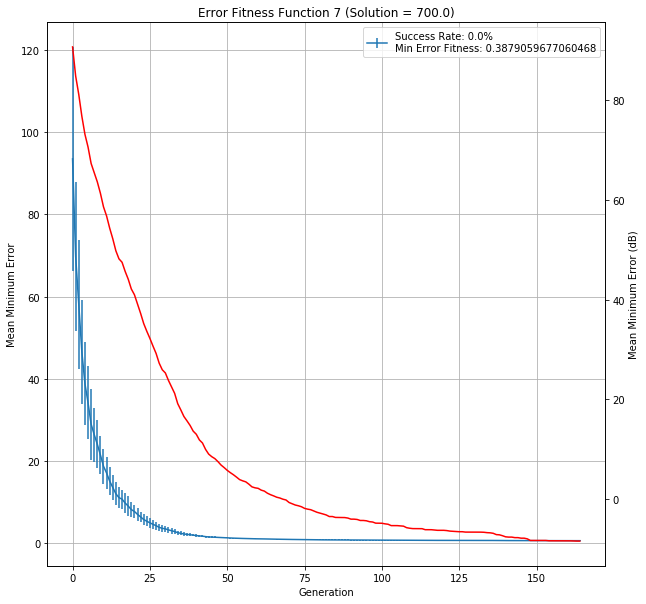

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[7_10_51_300_0.5_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,7,10,0.5,0.439856,0.64512,0.677192,0.574779,0.798943,0.542485,...,0.483595,0.601594,0.689567,0.568214,0.589206,0.705395,0.67839,0.652848,3:40:25,50100
